# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
from random import choices 
import matplotlib.ticker as ticker

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
import random

def dice_rolling(): 
    
 dices = []

 min = 1
 max = 6
 times = 10

 for i in range(1,times+1):
    dices.append(random.randint(min, max))
    
 return dices

In [3]:
#second solution 
#dice_rolls = pd.DataFrame(np.random.randint(1,6,size = 10))

#third solution 
#def dice_rolling(n):
#    return pd.DataFrame(np.array([random.choice(np.arange(1, 7, 1)) for i in range(n)]))

In [4]:
dice_rolling()

[5, 1, 3, 6, 6, 4, 3, 6, 2, 2]

In [5]:
dice_rolls = pd.DataFrame(dice_rolling())
dice_rolls.rename(columns = {0 : 'value'}, inplace = True)
dice_rolls

,value
0,1
1,2
2,2
3,5
4,2
5,4
6,3
7,3
8,4
9,1


#### 2.- Plot the results sorted by value.

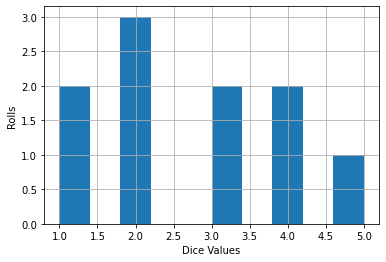

In [6]:
# your code here

dice_rolls = dice_rolls.sort_values('value')
list_dice_rolls = dice_rolls['value'].values.tolist()
#display(dice_rolls)
dice_rolls['value'].hist()
plt.ylabel("Rolls")
plt.xlabel("Dice Values")
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

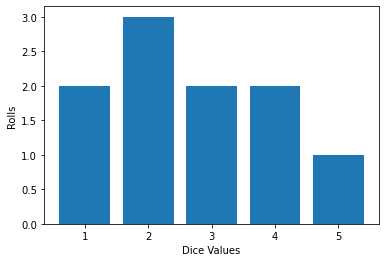

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

In [77]:
# your code here
frequency_dict_dice_rolls, mean_from_freq_dice_rolls = frequency(dice_rolls,'value')
#display(frequency_dict_dice_rolls)
plt.bar(range(len(frequency_dict_dice_rolls)), list(frequency_dict_dice_rolls.values()), align='center')
plt.xticks(range(len(frequency_dict_dice_rolls)), list(frequency_dict_dice_rolls.keys()))
plt.ylabel("Rolls")
plt.xlabel("Dice Values")
plt.show()
display(hundred_dice['value'].value_counts()) #used for validation


#The main difference between both is the 'binning' functionality, bassically in one you decide the distribution ranges to group the values and in other you are doing this by counting the frequency of each value and sorting by the amount of ocurrences.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
def dice_mean(lst,column):
    mean = lst[column].sum()/len(lst)
    return mean

dice_mean(dice_rolls,'value')

2.7

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here 
#def dice_frequency_mean(lst,column):
#    frequency = lst[column].value_counts().sum()
#    print(frequency)
#    return dice_mean(frequency,column)

def frequency(values,column):
    
    values = values[column].values.tolist()
   
    frequency_dict = {}
    for x in values:
        if x in frequency_dict:
            frequency_dict[x] += 1
        else:
            frequency_dict[x] = 1
            
    return frequency_dict, sum([value*freq for value, freq in frequency_dict.items()])/sum([freq for value, freq in frequency_dict.items()])


In [11]:
frequency_dict, mean_from_freq = frequency(dice_rolls,'value')
display(frequency(dice_rolls,'value'))
display(frequency_dict)
display(mean_from_freq)

({1: 2, 2: 3, 3: 2, 4: 2, 5: 1}, 2.7)

{1: 2, 2: 3, 3: 2, 4: 2, 5: 1}

2.7

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
# your code here

def dice_median(lst,column):
    
    lst_conv = lst[column].values.tolist()

    if len(lst_conv) % 2 == 0:
        median1 = lst_conv[len(lst_conv)//2]
        median2 = lst_conv[len(lst_conv)//2 - 1]
        median = (median1 + median2)/2
    else:
        median = lst_conv[len(lst_conv)//2]
    return median

display(dice_median(dice_rolls,'value'))
#display(dice_median(ages_pop,'observation'))
#display(dice_median(ages_pop2,'observation'))
#display(dice_median(ages_pop3,'observation'))

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
#def dice_quartiles_ranges(lst,column):
    
#    list_conv = lst['value'].values.tolist()
    
#    q2 = int(dice_median(lst,column))
#    q1 = list_conv[0:(len(list_conv)//2-1)]
#    q3 = list_conv[(len(list_conv)//2+1)::]
#    return "range 0 to Q1: " + str(q1), "range Q1 to Q2: " + str(q2), "range Q2 to Q3: " + str(q3)

#dice_quartiles_ranges(dice_rolls,'value')

In [14]:
# your code here
def dice_quartiles(lst,column):
    
    lst = lst.sort_values(column)
    list_conv = lst[column].values.tolist()
    
    middle = len(list_conv)//2
    q1 = dice_median(lst[:middle],column)
    median = dice_median(lst,column)
    q3 = dice_median(lst[middle:],column)
    
    return "q1:" + str(q1), "q2:" + str(median), "q3:" + str(q3)

dice_quartiles(dice_rolls,'value')

('q1:2', 'q2:2.5', 'q3:4')

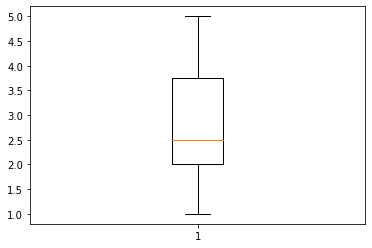

('q1:2', 'q2:2.5', 'q3:4')

In [15]:
# Used only for validation 

plt.boxplot(dice_rolls['value'])
plt.show()

display(dice_quartiles(dice_rolls,'value'))

In [16]:
# Used only for validation 

print("list : ", list_dice_rolls) 
print("Q1 quantile of arr : ", np.quantile(list_dice_rolls, .25))
print("Q2 quantile of arr : ", np.quantile(list_dice_rolls, .50))
print("Q3 quantile of arr : ", np.quantile(list_dice_rolls, .75))

list :  [1, 1, 2, 2, 2, 3, 3, 4, 4, 5]
Q1 quantile of arr :  2.0
Q2 quantile of arr :  2.5
Q3 quantile of arr :  3.75


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [17]:
# your code here
hundred_dice = pd.read_csv('../data/roll_the_dice_hundred.csv')
hundred_dice = hundred_dice.sort_values('value')

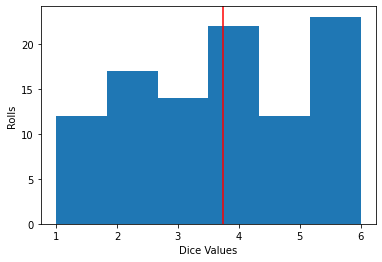

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

In [18]:
plt.hist(hundred_dice['value'], bins =6)
plt.axvline(x = dice_mean(hundred_dice,'value'), color = 'r', label = 'mean')
plt.ylabel("Rolls")
plt.xlabel("Dice Values")
plt.show()

#Most of the appeareances are on numbers 6 and 4 essentialy.
display(hundred_dice['value'].value_counts()) #bins validation

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [20]:
# your code here
dice_mean(hundred_dice,'value')

3.74

#### 3.- Now, calculate the frequency distribution.


In [21]:
# your code here
frequency_dict_100_dice, mean_from_freq_100_dice = frequency(hundred_dice,'value')
display(frequency_dict_100_dice)
display(hundred_dice['value'].value_counts()) #used for validation

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

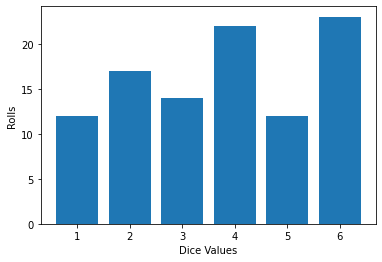

In [99]:
# your code here
plt.bar(range(len(frequency_dict_100_dice)), list(frequency_dict_100_dice.values()), align='center')
plt.xticks(range(len(frequency_dict_100_dice)), list(frequency_dict_100_dice.keys()))
plt.ylabel("Rolls")
plt.xlabel("Dice Values")
plt.show()


# The mean 3.74 is mainly distributed between the counts of 3, 4 and 6 numbers, but also number 2 takes it down to 3.74. 

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [23]:
# your code here
hundred_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
hundred_1000 = hundred_1000.sort_values('value')
hundred_1000.head()

,Unnamed: 0,roll,value
564,564,564,1
922,922,922,1
560,560,560,1
213,213,213,1
214,214,214,1


In [56]:
# your code here
frequency_dict_1000_dice, mean_from_freq_1000_dice = frequency(hundred_1000,'value')
display(frequency_dict_1000_dice)

{1: 175, 2: 167, 3: 175, 4: 168, 5: 149, 6: 166}

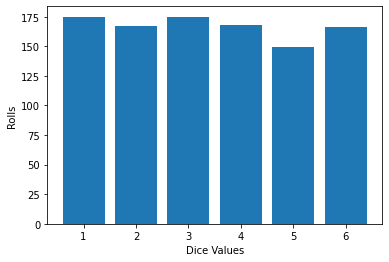

In [63]:
plt.bar(range(len(frequency_dict_1000_dice)), list(frequency_dict_1000_dice.values()), align='center')
plt.xticks(range(len(frequency_dict_1000_dice)), list(frequency_dict_1000_dice.keys()))
plt.ylabel("Rolls")
plt.xlabel("Dice Values")
plt.show()

# The amount of values add more possibilities to the counts, so the distribution gets affected. The fact of jumping from 10 to 100 to 1000 creates more versions of the same distribution, but this doesn't guarantee that the counts will remain similar, it will only create more chances of "balancing" the distribution, because more numbers will have the oppurtinity to increase their frequency.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [91]:
# your code here
ages_pop = pd.read_csv('../data/ages_population.csv')
ages_pop['observation'] = ages_pop['observation'].astype(int)
ages_pop = ages_pop.sort_values('observation')
ages_pop.head()

,observation
489,1
209,1
301,2
451,2
338,4


In [92]:
frequency_dict_ages_pop, mean_from_freq_ages_pop = frequency(ages_pop,'observation')
#display(frequency_dict_ages_pop)

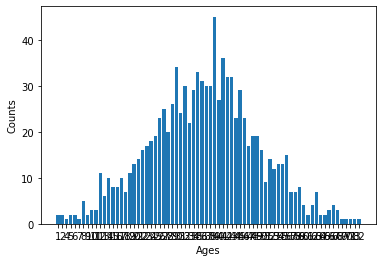

In [93]:
plt.bar(range(len(frequency_dict_ages_pop)), list(frequency_dict_ages_pop.values()), align='center')
plt.xticks(range(len(frequency_dict_ages_pop)), list(frequency_dict_ages_pop.keys()))
plt.ylabel("Counts")
plt.xlabel("Ages")
plt.show()

# Don't know how to split the values in less bars.

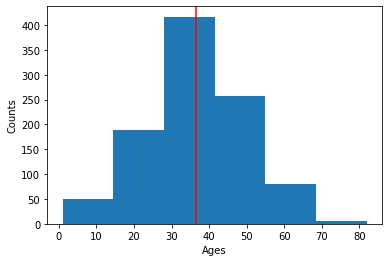

39    45
41    36
30    34
35    33
43    32
      ..
69     1
70     1
71     1
73     1
82     1
Name: observation, Length: 72, dtype: int64

In [94]:
plt.hist(ages_pop['observation'], bins =6)
plt.axvline(x = dice_mean(ages_pop,'observation'), color = 'r', label = 'mean')
plt.ylabel("Counts")
plt.xlabel("Ages")
plt.show()

#Most of the appeareances are on range 30-40 essentialy.
display(ages_pop['observation'].value_counts()) #bins validation

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [95]:
# your code here
display(ages_pop.mean())
display(ages_pop.std())

observation    36.56
dtype: float64

observation    12.8165
dtype: float64

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [96]:
# your code here
ages_pop2 = pd.read_csv('../data/ages_population2.csv')
ages_pop2['observation'] = ages_pop2['observation'].astype(int)
ages_pop2 = ages_pop2.sort_values('observation',ascending=False)
#ages_pop2.head()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [97]:
frequency_dict_ages_pop2, mean_from_freq_ages_pop2 = frequency(ages_pop2,'observation')
#display(frequency_dict_ages_pop2)

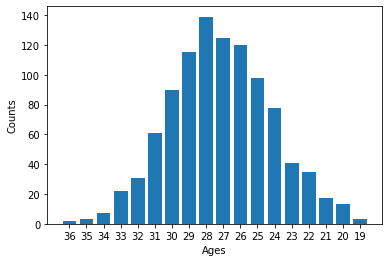

28    139
27    125
26    120
29    115
25     98
30     90
24     78
31     61
23     41
22     35
32     31
33     22
21     17
20     13
34      7
19      3
35      3
36      2
Name: observation, dtype: int64

In [102]:
plt.bar(range(len(frequency_dict_ages_pop2)), list(frequency_dict_ages_pop2.values()), align='center')
plt.xticks(range(len(frequency_dict_ages_pop2)), list(frequency_dict_ages_pop2.keys()))
plt.ylabel("Counts")
plt.xlabel("Ages")
plt.show()
display(ages_pop2['observation'].value_counts()) #bins validation

# The dataset contains a smaller min-max range than the one in step 1, most of the values are distributed between the 25-30 range the distrbution is likely more normal than the one in step 1.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [89]:
# your code here
display(ages_pop2.mean())
display(ages_pop2.std())

# Then mean almost fall in the same place, considering the fact that the dataset has a smaller range. 
# But the std is 10% less deviated from the mean and the range has to a lot to do with this. 

observation    27.155
dtype: float64

observation    2.969814
dtype: float64

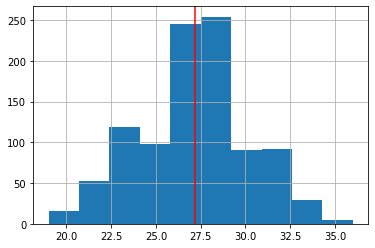

In [100]:
ages_pop2['observation'].hist()
#plt.hist(ages_pop2, bins =6)
plt.axvline(x = dice_mean(ages_pop2,'observation'), color = 'r', label = 'mean')
plt.show()

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [107]:
# your code here
ages_pop3 = pd.read_csv('../data/ages_population3.csv')
ages_pop3['observation'] = ages_pop3['observation'].astype(int)
ages_pop3 = ages_pop3.sort_values('observation')
ages_pop3.head()

,observation
263,1
924,2
415,2
639,4
698,4


In [105]:
frequency_dict_ages_pop3, mean_from_freq_ages_pop3 = frequency(ages_pop3,'observation')
#display(frequency_dict_ages_pop3)

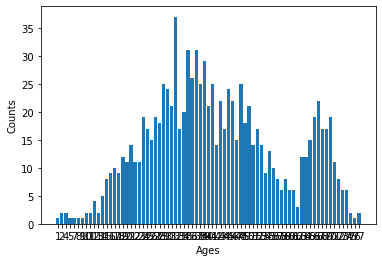

32    37
37    31
35    31
39    29
36    26
      ..
8      1
7      1
5      1
76     1
1      1
Name: observation, Length: 75, dtype: int64

In [108]:
plt.bar(range(len(frequency_dict_ages_pop3)), list(frequency_dict_ages_pop3.values()), align='center')
plt.xticks(range(len(frequency_dict_ages_pop3)), list(frequency_dict_ages_pop3.keys()))
plt.ylabel("Counts")
plt.xlabel("Ages")
plt.show()
display(ages_pop3['observation'].value_counts()) #bins validation

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [109]:
# your code here
display(ages_pop3.mean())
display(ages_pop3.std())

# 

observation    41.989
dtype: float64

observation    16.144706
dtype: float64

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

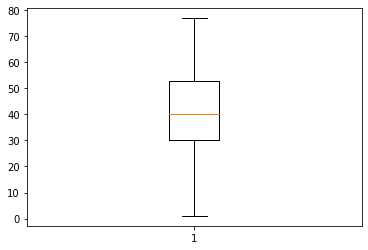

('q1:30.0', 'q2:40.0', 'q3:53.0')

In [111]:
# your code here

plt.boxplot(ages_pop3['observation'])
plt.show()

display(dice_quartiles(ages_pop3,'observation'))

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [116]:
# your code here

ages_pop_20p = np.percentile(ages_pop3, 20) 
ages_pop_65p = np.percentile(ages_pop3, 65) 
ages_pop_95p = np.percentile(ages_pop3, 95) 

display(ages_pop_20p, ages_pop_65p, ages_pop_95p)

28.0

47.0

70.0

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [49]:
# your code here